In [1]:
import pandas as pd
import re

# Import de NTLK et du corpus inaugural
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [2]:
# Import bible csv
bible_df = pd.read_csv('bible.csv')

In [3]:
# Stats descriptives sur le dataframe
bible_df.rename(columns={
    'b': 'book_id', 
    'c': 'chapter_id',
    'v': 'verse_id',
    't': 'text'
    }, inplace=True)

bible_df

,id,book_id,chapter_id,verse_id,text
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


In [4]:
# Now, clean !

# Use lambda to apply the function to each row of the DataFrame
def remove_all_punctuation(text):
   return re.sub(r'[^\w\s]', ' ', text)

def remove_partial_punctuation(text): # except .!?
   return re.sub(r'[^\w\s.!?]', ' ', text)

def carriage_return(text):
   return re.sub(r'\n', ' ', text)

def remove_double_space(text): # remove when more than 2 spaces
   return re.sub(r'[ ]{2,}', ' ', text)

def remove_empty_strings(text):
    return list(filter(None, text))

def remove_stopwords(text):
   text = tokenize(text)
   filtered_words = [word for word in text if word.lower() not in stopwords.words('english')]
   return filtered_words

def tokenize(text):
   return text.split(' ')

def join(text):
   return ' '.join(text)

def lemmatize(text):
    WNlemma = nltk.WordNetLemmatizer()
    lemmatized = []
    for token in text:
        lemmatized.append(WNlemma.lemmatize(token))
    return lemmatized

def remove_numbers(text):
    numbers = '0123456789'
    for number in numbers:
        text = text.replace(number, '')
    return text

def remove_short_words(word_list):
    return [word for word in word_list if len(word) > 1]

In [5]:
# Text without stopwords
bible_df['cleaned'] = bible_df['text'] \
   .apply(lambda x: remove_stopwords(x)) \
   .apply(lambda x: join(x)) \
   .apply(lambda x: carriage_return(x)) \
   .apply(lambda x: remove_double_space(x)) \
   .apply(lambda x: x.lower()) \
   .apply(lambda x: remove_all_punctuation(x)) \
   .apply(lambda x: remove_numbers(x)) \
   .apply(lambda x: tokenize(x)) \
   .apply(lambda x: remove_empty_strings(x)) \
   .apply(lambda x: lemmatize(x)) \
   .apply(lambda x: remove_short_words(x))
   
# Test cleaning efficiency printing the dataframe
bible_df

,id,book_id,chapter_id,verse_id,text,cleaned
0,1001001,1,1,1,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]"
1,1001002,1,1,2,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa...","[god, said, let, light, light]"
3,1001004,1,1,4,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d..."
4,1001005,1,1,5,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni..."
...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...","[spirit, bride, say, come, let, heareth, say, ..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...,"[testify, unto, every, man, heareth, word, pro..."
31100,66022019,66,22,19,And if any man shall take away from the words ...,"[man, shall, take, away, word, book, prophecy,..."
31101,66022020,66,22,20,"He which testifieth these things saith, Surely...","[testifieth, thing, saith, surely, come, quick..."


<Axes: xlabel='book_id', ylabel='chapter_id'>

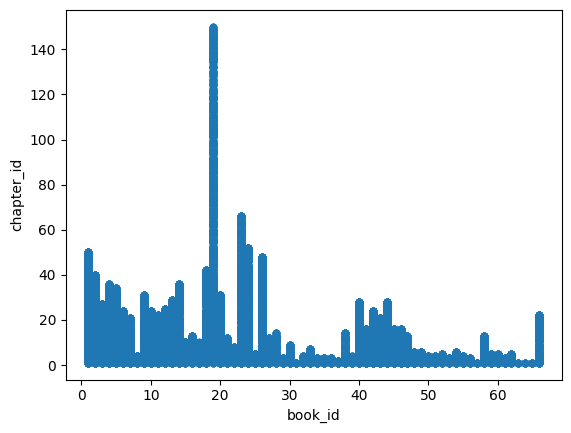

In [6]:
bible_df.plot(x='book_id', y='chapter_id', kind='scatter')
# book_id = représente le livre de la bible (1 = Genèse, 2 = Exode, 3= Lévitique, etc.)


In [7]:
#ceci est un test 

# Statistiques du texte (avec visualisations)

In [8]:
# Add descriptive columns
bible_df['word_count'] = bible_df['cleaned'].apply(lambda x: len(' '.join(x).split()))
bible_df['unique_words'] = bible_df['cleaned'].apply(lambda x: len(set(x)))
bible_df['avg_word_length'] = bible_df['cleaned'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0) 
bible_df['sentence_count'] = bible_df['text'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))

bible_df



,id,book_id,chapter_id,verse_id,text,cleaned,word_count,unique_words,avg_word_length,sentence_count
0,1001001,1,1,1,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]",5,5,6.000000,1
1,1001002,1,1,2,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f...",14,12,4.785714,2
2,1001003,1,1,3,"And God said, Let there be light: and there wa...","[god, said, let, light, light]",5,4,4.000000,1
3,1001004,1,1,4,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d...",8,6,4.750000,1
4,1001005,1,1,5,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni...",11,9,5.272727,2
...,...,...,...,...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...","[spirit, bride, say, come, let, heareth, say, ...",18,13,4.666667,4
31099,66022018,66,22,18,For I testify unto every man that heareth the ...,"[testify, unto, every, man, heareth, word, pro...",20,14,4.700000,0
31100,66022019,66,22,19,And if any man shall take away from the words ...,"[man, shall, take, away, word, book, prophecy,...",19,14,4.421053,1
31101,66022020,66,22,20,"He which testifieth these things saith, Surely...","[testifieth, thing, saith, surely, come, quick...",12,11,5.000000,3


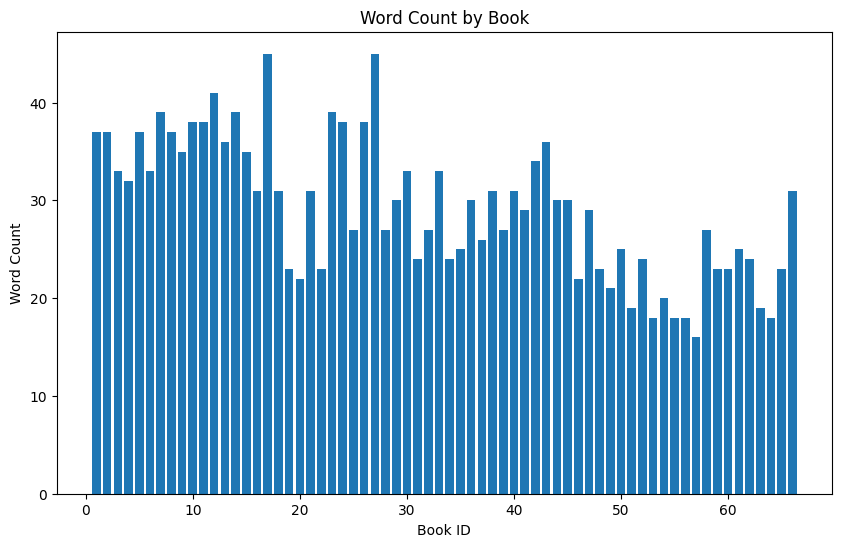

In [9]:
# Nombres de mots par livre de la bible

import matplotlib.pyplot as plt

# Graph 1: Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(bible_df['book_id'], bible_df['word_count'])
plt.xlabel('Book ID')
plt.ylabel('Word Count')
plt.title('Word Count by Book')
plt.show()



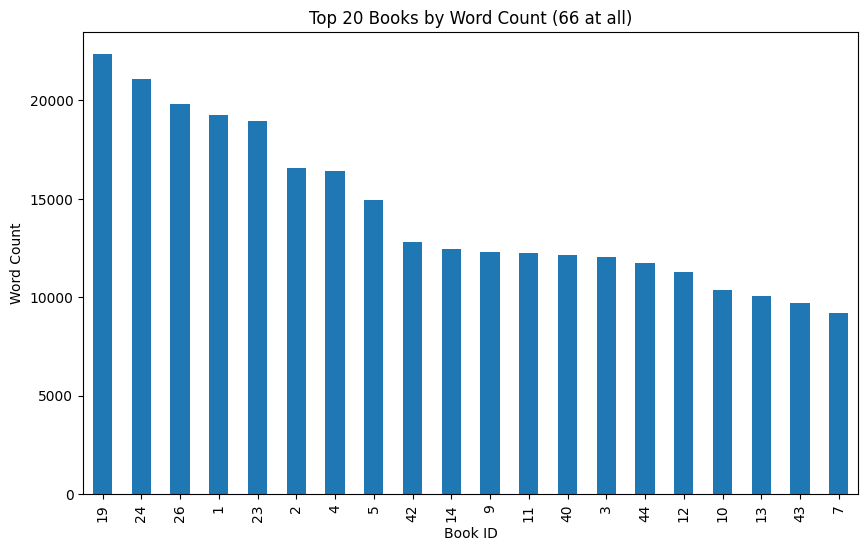

In [10]:
# Top des livres par nombre de mots (top 20) pour la lisibilité
top_10_books = bible_df.groupby('book_id')['word_count'].sum().nlargest(20)
top_10_books
top_10_books.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Book ID')
plt.ylabel('Word Count')
plt.title('Top 20 Books by Word Count (66 at all)')
plt.show()


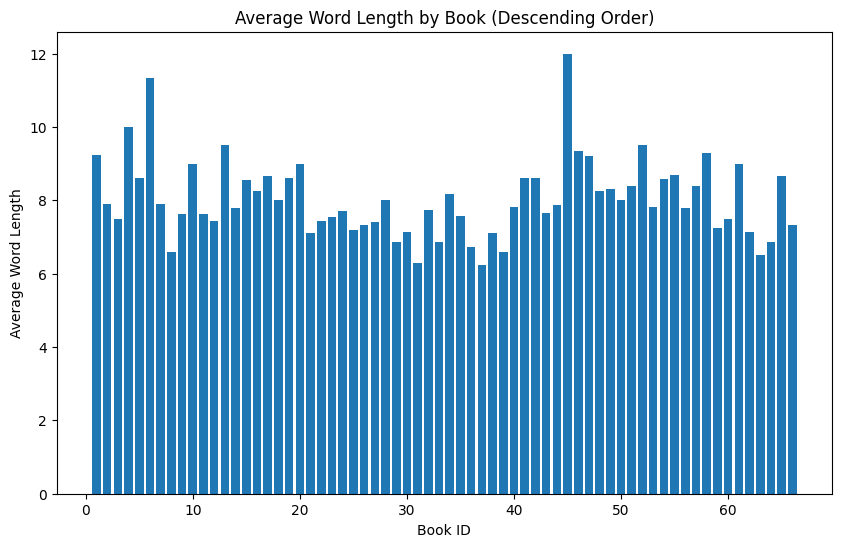

In [11]:
# Nombres de mots par livre de la bible 
plt.figure(figsize=(10, 6))
bible_df_sorted = bible_df.sort_values('avg_word_length')
plt.bar(bible_df_sorted['book_id'], bible_df_sorted['avg_word_length'])
plt.xlabel('Book ID')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Book (Descending Order)')
plt.show()


## 2. Nettoyage des données

Définition de plusieurs fonctions de nettoyage des données, et application de ces dernières sur différentes colonnes du dataframe, correspondant à un niveau de nettoyage différent qui sera utile pour les prochaines étapes. 

In [12]:
import re

# Use lambda to apply the function to each row of the DataFrame
def remove_all_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

def remove_partial_punctuation(text): # except .!?
    return re.sub(r'[^\w\s.!?]', ' ', text)

def carriage_return(text):
    return re.sub(r'\n', ' ', text)

def remove_double_space(text): # remove when more than 2 spaces
    return re.sub(r'[ ]{2,}', ' ', text)

def remove_empty_strings(text):
     return list(filter(None, text))

def remove_stopwords(text):
    text = tokenize(text)
    filtered_words = [word for word in text if word.lower() not in stopwords.words('english')]
    return filtered_words

def tokenize(text):
    return text.split(' ')

def join(text):
    return ' '.join(text)

def lemmatize(text):
     WNlemma = nltk.WordNetLemmatizer()
     lemmatized = []
     for token in text:
          lemmatized.append(WNlemma.lemmatize(token))
     return lemmatized

def remove_numbers(text):
     numbers = '0123456789'
     for number in numbers:
          text = text.replace(number, '')
     return text

def remove_single_letter_words(text):
    filtered_words = [word for word in text if len(word) > 1]
    return filtered_words

bible_df_cleaned = bible_df.copy()

# Text without stopwords
# bible_df_cleaned['text_without_stopwords'] = bible_df_cleaned['text'] \
#     .apply(lambda x: remove_stopwords(x)) \
#     .apply(lambda x: join(x)) \
#     .apply(lambda x: carriage_return(x)) \
#     .apply(lambda x: remove_double_space(x))

# # Clean text partially for later
# bible_df_cleaned['text_partially_cleaned'] = bible_df_cleaned['text_without_stopwords'] \
#     .apply(lambda x: remove_partial_punctuation(x)) \
#     .apply(lambda x: remove_double_space(x)) \
#     .apply(lambda x: x.lower()) \

# # Advanced cleaning
# bible_df_cleaned['text'] = bible_df_cleaned['text_partially_cleaned'] \
#     .apply(lambda x: remove_all_punctuation(x)) \
#     .apply(lambda x: remove_numbers(x)) \
#     .apply(lambda x: remove_double_space(x)) \
#     .apply(lambda x: tokenize(x)) \
#     .apply(lambda x: remove_single_letter_words(x)) \
#     .apply(lambda x: remove_empty_strings(x)) \
#     .apply(lambda x: lemmatize(x))

# Test cleaning efficiency printing the dataframe
bible_df_cleaned


,id,book_id,chapter_id,verse_id,text,cleaned,word_count,unique_words,avg_word_length,sentence_count
0,1001001,1,1,1,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]",5,5,6.000000,1
1,1001002,1,1,2,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f...",14,12,4.785714,2
2,1001003,1,1,3,"And God said, Let there be light: and there wa...","[god, said, let, light, light]",5,4,4.000000,1
3,1001004,1,1,4,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d...",8,6,4.750000,1
4,1001005,1,1,5,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni...",11,9,5.272727,2
...,...,...,...,...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...","[spirit, bride, say, come, let, heareth, say, ...",18,13,4.666667,4
31099,66022018,66,22,18,For I testify unto every man that heareth the ...,"[testify, unto, every, man, heareth, word, pro...",20,14,4.700000,0
31100,66022019,66,22,19,And if any man shall take away from the words ...,"[man, shall, take, away, word, book, prophecy,...",19,14,4.421053,1
31101,66022020,66,22,20,"He which testifieth these things saith, Surely...","[testifieth, thing, saith, surely, come, quick...",12,11,5.000000,3


In [13]:
# Test cleaning efficiency printing the first row
# cela permet de comparer les différentes étapes de nettoyage

print('Cleaned text: \n' + str(bible_df_cleaned['text'][0]))
print('Cleaned text: \n' + str(bible_df_cleaned['cleaned'][0]))
# print('Partially cleaned text (without puncutation except points):\n' + str(bible_df_cleaned['text_partially_cleaned'][0]))
# print('Text without stopwords and carriage return: \n' + str(bible_df_cleaned['text_without_stopwords'][0]))


Cleaned text: 
In the beginning God created the heaven and the earth.
Cleaned text: 
['beginning', 'god', 'created', 'heaven', 'earth']


## 3.Analyse des données

### Analyse des mots les plus fréquents

In [14]:
from collections import Counter

# Concatenate all the cleaned text into a single string
all_text = ' '.join(bible_df_cleaned['cleaned'].sum())

# Count the frequency of each word in the text
word_counts = Counter(all_text.split())

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Print the top words
for word, count in top_words:
    print(f'{word}: {count}')


shall: 9838
unto: 8997
lord: 8006
thou: 5474
god: 4716
thy: 4600
said: 3999
ye: 3982
thee: 3827
him: 3493


In [15]:
#Number of verse in the bible
print("Number of verse in the bible : ", len(bible_df_cleaned))

Number of verse in the bible :  31103


In [16]:
unique_words = len(bible_df_cleaned['text'].explode().unique())
print("Number of unique words in the Bible:", unique_words)

Number of unique words in the Bible: 30834


In [17]:
# Count the number of times "Jesus" appears in the Bible
jesus_count = bible_df_cleaned['cleaned'].explode().str.count('jesus').sum()

# Print the result
print("Number of times 'Jesus' appears in the Bible:", int(jesus_count))

Number of times 'Jesus' appears in the Bible: 984


In [18]:
god_count = bible_df_cleaned['cleaned'].explode().str.count('god').sum()
print("Number of times 'God' appears in the Bible:", int(god_count))


Number of times 'God' appears in the Bible: 4787


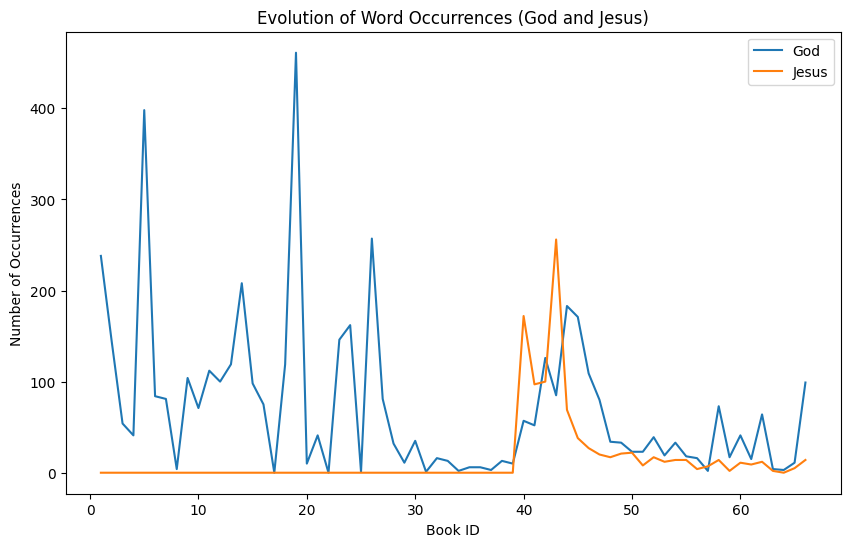

In [19]:
import matplotlib.pyplot as plt

# Group the dataframe by book_id and calculate the sum of occurrences for each word
god_counts = bible_df_cleaned.groupby('book_id')['cleaned'].apply(lambda x: x.explode().str.count('god').sum())
jesus_counts = bible_df_cleaned.groupby('book_id')['cleaned'].apply(lambda x: x.explode().str.count('jesus').sum())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(god_counts.index, god_counts.values, label='God')
plt.plot(jesus_counts.index, jesus_counts.values, label='Jesus')
plt.xlabel('Book ID')
plt.ylabel('Number of Occurrences')
plt.title('Evolution of Word Occurrences (God and Jesus)')
plt.legend()
plt.show()

In [20]:
# Filter the dataframe to include only books 1 to 37
old_testament_df = bible_df_cleaned[(bible_df_cleaned['book_id'] >= 1) & (bible_df_cleaned['book_id'] <= 37)]

# Count the occurrences of the word "jesus" in the filtered dataframe
jesus_count = old_testament_df['text'].explode().str.count('jesus').sum()

# Print the result
print("Number of times 'Jesus' appears between books 1 and 30:", jesus_count)

Number of times 'Jesus' appears between books 1 and 30: 0


In [21]:
## 4. Transformation des données
### POS Tagging

In [22]:
# for each inaugural discourse, tokenize sentence by sentence 
# bible_df_cleaned['text_partially_cleaned_tokenized'] = bible_df_cleaned['text_without_stopwords'].apply(lambda x: nltk.sent_tokenize(x))

def pos_tagging_for_corpus(corpus):
    result = []
    for sentence in corpus:
        words = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        result.append(pos_tags)
    return result

bible_df_cleaned['text_pos_processed'] = bible_df_cleaned['cleaned'].apply(lambda x: pos_tagging_for_corpus(x))

bible_df_cleaned['text_pos_processed']


0        [[(beginning, VBG)], [(god, NN)], [(created, V...
1        [[(earth, NN)], [(without, IN)], [(form, NN)],...
2        [[(god, NN)], [(said, VBD)], [(let, VB)], [(li...
3        [[(god, NN)], [(saw, NN)], [(light, NN)], [(go...
4        [[(god, NN)], [(called, VBN)], [(light, NN)], ...
                               ...                        
31098    [[(spirit, NN)], [(bride, NN)], [(say, VB)], [...
31099    [[(testify, NN)], [(unto, NN)], [(every, DT)],...
31100    [[(man, NN)], [(shall, MD)], [(take, VB)], [(a...
31101    [[(testifieth, NNS)], [(thing, NN)], [(saith, ...
31102    [[(grace, NN)], [(lord, NN)], [(jesus, NN)], [...
Name: text_pos_processed, Length: 31103, dtype: object

### NER 

In [23]:
# Downloading ressources 
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Tokenisation et POS tagging
tokens = bible_df_cleaned['cleaned']
pos_tags = bible_df_cleaned['text_pos_processed']

print(tokens[0])
print(pos_tags[0])

['beginning', 'god', 'created', 'heaven', 'earth']
[[('beginning', 'VBG')], [('god', 'NN')], [('created', 'VBN')], [('heaven', 'NN')], [('earth', 'NN')]]


[nltk_data] Error loading maxent_ne_chunker: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>
[nltk_data] Error loading words: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [24]:
# Retourne une liste de tuples contenant les entités nommées et leurs types associés à partir d'un corpus de phrases, en réutilisant le traitement effectué précédemment dans le POS
def get_named_entities(corpus_pos_tagged):
    named_entities = []

    for sentence_pos_tagged in corpus_pos_tagged:
        sentence = [pos_tuple for pos_tuple in sentence_pos_tagged]
        ner_tree = nltk.ne_chunk(sentence)
        
        for subtree in ner_tree:

            if isinstance(subtree, nltk.Tree) and subtree.label() != 'S':
                entity = " ".join([word for word, tag in subtree.leaves()])
                entity_type = subtree.label()
                named_entities.append((entity, entity_type))

    return named_entities

bible_df_cleaned['named_entities'] = bible_df_cleaned['text_pos_processed'].apply(lambda x: get_named_entities(x))

# cela pemet en fait de récupérer les entités nommées et leurs types associés à partir d'un corpus de phrases, 
# en réutilisant le traitement effectué précédemment dans le POS
#

### Bag of Words 

In [25]:
# get all uniques words and add them to a dataframe

cleaned_corpus = bible_df_cleaned['cleaned'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer()
cv_matrix = cv.fit_transform(cleaned_corpus)

cv_matrix1 = cv_matrix.toarray()
cv_matrix1

# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
bible_df_feature_vectors = pd.DataFrame(cv_matrix1, columns=vocab)

bible_df_feature_vectors

,aaron,aaronites,abaddon,abagtha,abana,abarim,abase,abased,abasing,abated,...,zorathites,zoreah,zorites,zorobabel,zuar,zuph,zur,zuriel,zurishaddai,zuzims
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N-Gram Model

Récupération des bi-grammes les plus intéressants, avec une occurence tous textes confondus supérieure à 30

In [54]:
# TODO: Not working, need to sample bigrams randomly

# bv = CountVectorizer(ngram_range=(2,2))
# bv_matrix = bv.fit_transform(cleaned_corpus)
# bv_matrix = bv_matrix.toarray()
# vocab = bv.get_feature_names_out()
# bible_df_bigram_trigram = pd.DataFrame(bv_matrix, columns=vocab)
# bible_df_bigram_trigram.sum()
# # Delete columns with less than 25 occurences everywhere 
# df_inaugural_corpus_bigram_trigram = bible_df_bigram_trigram.loc[:, (bible_df_bigram_trigram.sum(axis=0) >= 2)]

# Add year column to the dataframe as index
# bible_bigram_trigram.insert(0, 'year', bible_df_bigram_trigram['year'].values)
# bible_bigram_trigram

# # Plot the most common bigrams and trigrams by year
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.ylabel('Inaugural words count')
# plt.xlabel('Year') 
# plt.title('Most common bigrams and trigrams by year of the inaugural discourses')
# plt.subplots_adjust(bottom=0.15)
# plt.xticks(rotation=90)
# # make one plot for each bigram and trigram
# for column in bible_bigram_trigram.drop(columns=['year']).columns:
#     plt.plot(bible_bigram_trigram['year'], bible_df_bigram_trigram[column])

# # add legend    
# plt.legend(bible_bigram_trigram.drop(columns=['year']).columns, loc='upper left')


# bible_bigram_trigram



: 

### TF-IDF

In [27]:
# Import des librairies
import scipy.sparse as sp
import numpy as np

# Reuse BOW from before
feature_names = list(bible_df_feature_vectors.columns)
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bible_df_feature_vectors, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later
# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,aaron,aaronites,abaddon,abagtha,abana,abarim,abase,abased,abasing,abated,...,zorathites,zoreah,zorites,zorobabel,zuar,zuph,zur,zuriel,zurishaddai,zuzims
0,332,3,2,2,2,5,5,5,2,7,...,2,2,2,4,6,4,6,2,6,2


In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer().fit(bible_df_feature_vectors)
len(vect.get_feature_names_out())

11386

In [29]:
X_vectorized = vect.transform(bible_df_feature_vectors)

In [30]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['aaron' 'pirathonite' 'pisgah' 'pisidia' 'pison' 'pispah' 'piss'
 'pisseth' 'pit' 'pirathon']

Largest tfidf: 
['zuzims' 'fleshly' 'flagon' 'flag' 'fixed' 'five' 'fitteth' 'fitted'
 'fitly' 'fitch']


In [31]:
# Créer la matrice TF-IDF
vectorizer_tfidf = TfidfVectorizer(token_pattern=r'\b\w{8,}\b')
tfidf_matrix = vectorizer_tfidf.fit_transform(bible_df_cleaned['text'])

# Obtenir les noms des termes
feature_names = vectorizer_tfidf.get_feature_names_out()

# Créer une liste pour stocker les résultats de chaque livre
tfidf_book_results = []

# Parcourir chaque livre et obtenir les 3 termes avec les scores TF-IDF les plus élevés
for idx, book_text in enumerate(bible_df_cleaned['text']):
    # Obtenir le nom du livre à partir de l'index
    book_name = idx + 1
    
    # Obtenir les scores TF-IDF pour chaque terme dans le livre
    tfidf_scores = tfidf_matrix[idx, :].toarray()[0]
    
    # Créer une liste de tuples (terme, score TF-IDF) pour les termes de plus de 7 lettres
    term_tfidf_list = [(term, round(score, 2)) for term, score in zip(feature_names, tfidf_scores) if len(term) > 6]

    # Trier la liste par score TF-IDF décroissant et prendre les 3 premiers termes
    sorted_tfidf_list = sorted(term_tfidf_list, key=lambda x: x[1], reverse=True)[:3]

    # Ajouter les 3 termes avec leurs scores TF-IDF aux résultats
    tfidf_book_results.append((book_name, sorted_tfidf_list))

# Créer un dataframe à partir des résultats
tfidf_df = pd.DataFrame(tfidf_book_results, columns=['Livre', 'Top 3 Termes TF-IDF'])

tfidf_df


KeyboardInterrupt: 

# Clustering

In [ ]:
# TF-IDF with fit_transform
# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')

# Fit and transform the complaints text to create embeddings
tfidf_matrix = tfidf_vectorizer.fit_transform(bible_df_cleaned['text'].apply(lambda x: " ".join(x)))
 
tfidf_matrix.shape


(31103, 1000)

In [ ]:
from sklearn.decomposition import PCA
 
# Initialize PCA and reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())
 
reduced_tfidf.shape

(31103, 2)

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\guill\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\guill\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

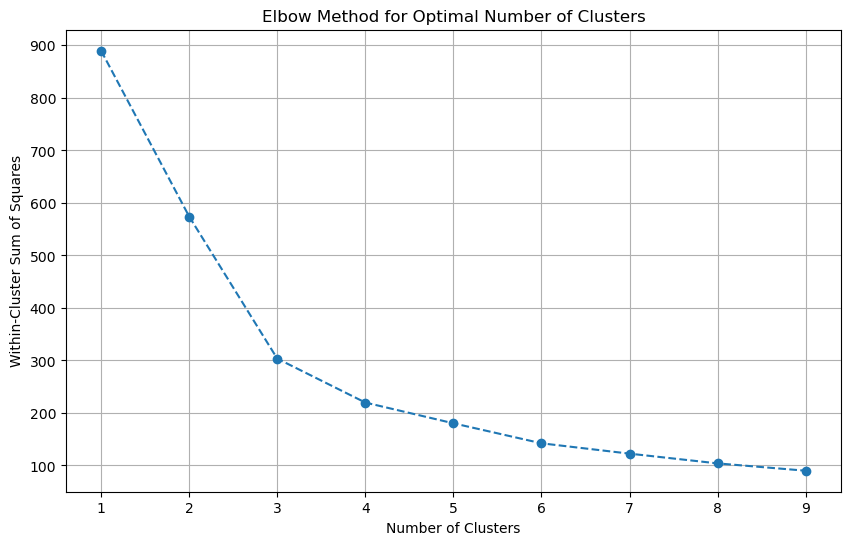

In [ ]:
# Test d'Elbow pour déterminer le nombre optimal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# Determine the optimal number of clusters using the Elbow method
scores = []  # within-cluster sum of squares
cluster_range = range(1, 10)  # test up to 10 clusters
 
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(reduced_tfidf)
    scores.append(kmeans.inertia_)
 
#Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


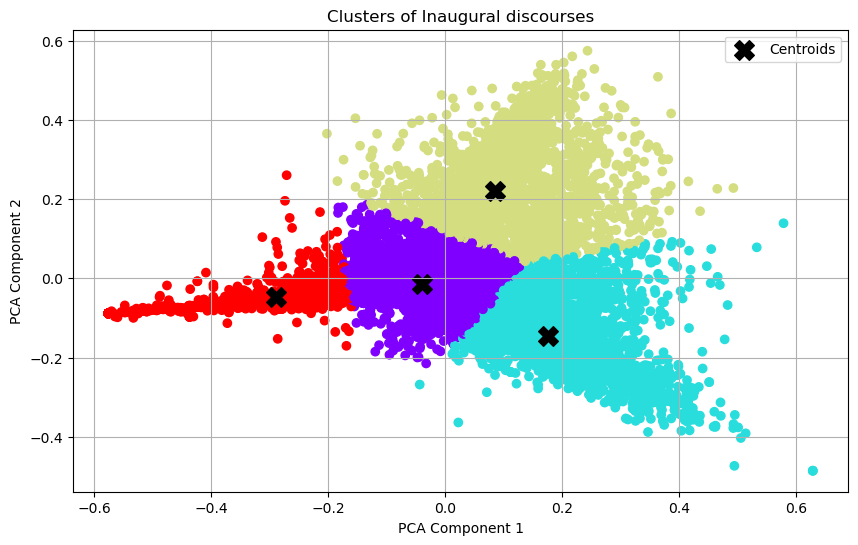

In [ ]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=100)
clusters = kmeans.fit_predict(reduced_tfidf)
 
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Inaugural discourses')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train = bible_df_cleaned['text']
y_km = kmeans.fit_predict(reduced_tfidf)
df_km = pd.DataFrame({'statements' :X_train, 'topic_cluster' :y_km })
print(df_km.groupby('topic_cluster').count())
df_km.head(10)

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               statements
topic_cluster            
0                   20270
1                    4713
2                    4699
3                    1421


,statements,topic_cluster
0,"[beginning, god, created, heaven, earth]",0
1,"[earth, without, form, void, darkness, upon, f...",0
2,"[god, said, let, light, light]",0
3,"[god, saw, light, good, god, divided, light, d...",0
4,"[god, called, light, day, darkness, called, ni...",0
5,"[god, said, let, firmament, midst, water, let,...",0
6,"[god, made, firmament, divided, water, firmame...",0
7,"[god, called, firmament, heaven, evening, morn...",0
8,"[god, said, let, water, heaven, gathered, toge...",0
9,"[god, called, dry, land, earth, gathering, tog...",0


# LDA

In [ ]:
from gensim import corpora
import gensim

## On crée notre dictionnaire des données
id2word = corpora.Dictionary(bible_df_cleaned['text'])
## On crée nos vecteurs avec Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bible_df_cleaned['text']]

In [ ]:
from pprint import pprint

# number of topics
num_topics = 4
# Build LDA model
lda_model3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                        random_state=100)
# Print the Keyword in the 3 topics
pprint(lda_model3.print_topics(num_topics))
doc_lda3 = 0

[(0,
  '0.041*"shall" + 0.034*"unto" + 0.017*"thee" + 0.015*"lord" + 0.014*"thy" + '
  '0.013*"god" + 0.013*"thou" + 0.010*"them" + 0.010*"him" + 0.010*"come"'),
 (1,
  '0.019*"lord" + 0.017*"shall" + 0.017*"came" + 0.013*"thy" + 0.011*"him" + '
  '0.011*"thou" + 0.011*"unto" + 0.010*"god" + 0.009*"one" + 0.008*"upon"'),
 (2,
  '0.031*"lord" + 0.026*"unto" + 0.018*"god" + 0.011*"shall" + 0.010*"said" + '
  '0.010*"thou" + 0.009*"day" + 0.009*"king" + 0.009*"ye" + 0.009*"hath"'),
 (3,
  '0.031*"shall" + 0.019*"thou" + 0.018*"unto" + 0.015*"son" + 0.015*"ye" + '
  '0.014*"thy" + 0.013*"lord" + 0.013*"said" + 0.010*"thee" + 0.008*"man"')]


In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model3, texts=bible_df_cleaned['text'], dictionary=id2word, coherence='u_mass')
coherence_model_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_model_lda)

Coherence Score:  -2.4830991729833762


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Visualisation of topics 
vis_data = gensimvis.prepare(lda_model3, corpus, id2word, sort_topics=False)
pyLDAvis.save_html(vis_data, 'output_topics_LDA.html')
pyLDAvis.display(vis_data)

In [ ]:
## A garder en plus
# Choosing number of topics Round 2
topics = list(range(1,20))
coherences = []

for no_topics in topics:
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=no_topics, random_state=100)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=bible_df_cleaned['text'], dictionary=id2word, coherence='u_mass')
    coherences.append(coherence_model_lda.get_coherence())
    print(coherence_model_lda.get_coherence())
doc_lda = lda_model[corpus]

-2.395340862861914


KeyboardInterrupt: 

# 3.Sentiment Analysis avec NLTK (from nltk.sentiment import sentimentIntensityAnalyzer)

In [ ]:
# import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer




In [ ]:
bible_df_cleaned

,id,book_id,chapter_id,verse_id,text,cleaned,word_count,unique_words,avg_word_length,sentence_count,text_without_stopwords,text_partially_cleaned,text_partially_cleaned_tokenized,text_pos_processed,named_entities
0,1001001,1,1,1,"[beginning, god, created, heaven, earth]","[beginning, god, created, heaven, earth]",5,5,6.000000,1,beginning God created heaven earth.,beginning god created heaven earth.,[beginning God created heaven earth.],"[[(beginning, VBG), (God, NNP), (created, VBD)...","[(God, PERSON)]"
1,1001002,1,1,2,"[earth, without, form, void, darkness, upon, f...","[earth, without, form, void, darkness, upon, f...",14,12,4.785714,2,"earth without form, void; darkness upon face d...",earth without form void darkness upon face dee...,"[earth without form, void; darkness upon face ...","[[(earth, NN), (without, IN), (form, NN), (,, ...","[(Spirit, PERSON), (God, PERSON)]"
2,1001003,1,1,3,"[god, said, let, light, light]","[god, said, let, light, light]",5,4,4.000000,1,"God said, Let light: light.",god said let light light.,"[God said, Let light: light.]","[[(God, NNP), (said, VBD), (,, ,), (Let, NNP),...","[(God, PERSON), (Let, PERSON)]"
3,1001004,1,1,4,"[god, saw, light, good, god, divided, light, d...","[god, saw, light, good, god, divided, light, d...",8,6,4.750000,1,"God saw light, good: God divided light darkness.",god saw light good god divided light darkness.,"[God saw light, good: God divided light darkne...","[[(God, NNP), (saw, VBD), (light, JJ), (,, ,),...","[(God, PERSON)]"
4,1001005,1,1,5,"[god, called, light, day, darkness, called, ni...","[god, called, light, day, darkness, called, ni...",11,9,5.272727,2,"God called light Day, darkness called Night. e...",god called light day darkness called night. ev...,"[God called light Day, darkness called Night.,...","[[(God, NNP), (called, VBD), (light, JJ), (Day...","[(God, PERSON), (Night, GPE)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,66022017,66,22,17,"[spirit, bride, say, come, let, heareth, say, ...","[spirit, bride, say, come, let, heareth, say, ...",18,13,4.666667,4,"Spirit bride say, Come. let heareth say, Come....",spirit bride say come. let heareth say come. l...,"[Spirit bride say, Come., let heareth say, Com...","[[(Spirit, NNP), (bride, NN), (say, VBP), (,, ...","[(Spirit, GPE), (Come, ORGANIZATION), (Come, O..."
31099,66022018,66,22,18,"[testify, unto, every, man, heareth, word, pro...","[testify, unto, every, man, heareth, word, pro...",20,14,4.700000,0,testify unto every man heareth words prophecy ...,testify unto every man heareth words prophecy ...,[testify unto every man heareth words prophecy...,"[[(testify, VB), (unto, JJ), (every, DT), (man...","[(God, PERSON)]"
31100,66022019,66,22,19,"[man, shall, take, away, word, book, prophecy,...","[man, shall, take, away, word, book, prophecy,...",19,14,4.421053,1,"man shall take away words book prophecy, God s...",man shall take away words book prophecy god sh...,"[man shall take away words book prophecy, God ...","[[(man, NN), (shall, MD), (take, VB), (away, R...","[(God, PERSON)]"
31101,66022020,66,22,20,"[testifieth, thing, saith, surely, come, quick...","[testifieth, thing, saith, surely, come, quick...",12,11,5.000000,3,"testifieth things saith, Surely come quickly. ...",testifieth things saith surely come quickly. a...,"[testifieth things saith, Surely come quickly....","[[(testifieth, JJ), (things, NNS), (saith, NN)...","[(Amen, GPE), (Lord Jesus, PERSON)]"


In [ ]:
# Import libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Convert the list of words to a string
bible_df_cleaned['cleaned_text'] = bible_df_cleaned['cleaned'].apply(lambda x: ' '.join(x))




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Define a function to calculate sentiment score for a given verse
def get_sentiment_score(verse):
    # Calculate sentiment score
    sentiment_score = sia.polarity_scores(verse)['compound']
    return sentiment_score

# Apply the sentiment analysis function to the 'cleaned_text' column in your DataFrame
bible_df_cleaned['sentiment_score'] = bible_df_cleaned['cleaned_text'].apply(get_sentiment_score)

# Categorize sentiment based on the sentiment score
bible_df_cleaned['sentiment'] = bible_df_cleaned['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Display the DataFrame with sentiment scores and categories
print(bible_df_cleaned[['text', 'sentiment_score', 'sentiment']])


                                                    text  sentiment_score  \
0               [beginning, god, created, heaven, earth]           0.7506   
1      [earth, without, form, void, darkness, upon, f...           0.5484   
2                         [god, said, let, light, light]           0.2732   
3      [god, saw, light, good, god, divided, light, d...           0.6249   
4      [god, called, light, day, darkness, called, ni...           0.0258   
...                                                  ...              ...   
31098  [spirit, bride, say, come, let, heareth, say, ...           0.5574   
31099  [testify, unto, every, man, heareth, word, pro...           0.2732   
31100  [man, shall, take, away, word, book, prophecy,...           0.2732   
31101  [testifieth, thing, saith, surely, come, quick...           0.4404   
31102            [grace, lord, jesus, christ, all, amen]           0.4215   

      sentiment  
0      positive  
1      positive  
2      positive  
3  

In [ ]:
# Create a new DataFrame for visualization

visualization_df = pd.DataFrame({
    'Verse': bible_df_cleaned['text'],
    'Sentiment Score': bible_df_cleaned['sentiment_score'],
    'Sentiment': bible_df_cleaned['sentiment']
})

visualization_df


,Verse,Sentiment Score,Sentiment
0,"[beginning, god, created, heaven, earth]",0.7506,positive
1,"[earth, without, form, void, darkness, upon, f...",0.5484,positive
2,"[god, said, let, light, light]",0.2732,positive
3,"[god, saw, light, good, god, divided, light, d...",0.6249,positive
4,"[god, called, light, day, darkness, called, ni...",0.0258,positive
...,...,...,...
31098,"[spirit, bride, say, come, let, heareth, say, ...",0.5574,positive
31099,"[testify, unto, every, man, heareth, word, pro...",0.2732,positive
31100,"[man, shall, take, away, word, book, prophecy,...",0.2732,positive
31101,"[testifieth, thing, saith, surely, come, quick...",0.4404,positive


In [ ]:
negative_verses = visualization_df[visualization_df['Sentiment'] == 'negative']
negative_verses

# exemple words negative : evil, wicked, hate, kill, death, sin, devil, hell, etc.

,Verse,Sentiment Score,Sentiment
47,"[tree, knowledge, good, evil, thou, shalt, eat...",-0.5423,negative
54,"[therefore, shall, man, leave, father, mother,...",-0.0516,negative
55,"[naked, man, wife, ashamed]",-0.4767,negative
58,"[fruit, tree, midst, garden, god, hath, said, ...",-0.4215,negative
59,"[serpent, said, unto, woman, ye, shall, surely...",-0.2500,negative
...,...,...,...
31054,"[whosoever, found, written, book, life, cast, ...",-0.3400,negative
31062,"[fearful, unbelieving, abominable, murderer, w...",-0.9712,negative
31084,"[shall, curse, throne, god, lamb, shall, it, s...",-0.3400,negative
31092,"[unjust, let, unjust, still, filthy, let, filt...",-0.7650,negative


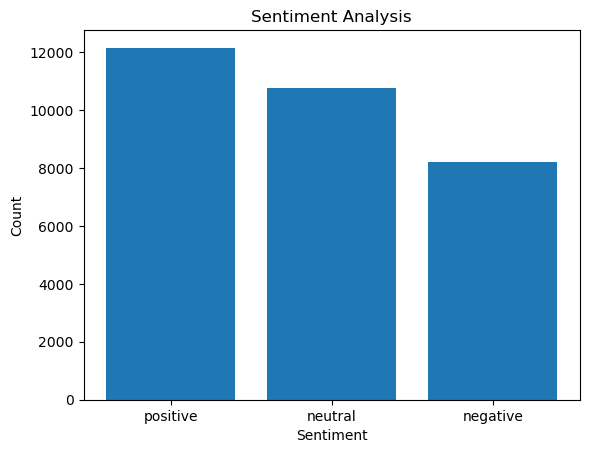

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each sentiment category
sentiment_counts = visualization_df['Sentiment'].value_counts()

# Plot the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()


In [ ]:
visualization_df['book_id'] = bible_df_cleaned['book_id']
visualization_df

,Verse,Sentiment Score,Sentiment,book_id
0,"[beginning, god, created, heaven, earth]",0.7506,positive,1
1,"[earth, without, form, void, darkness, upon, f...",0.5484,positive,1
2,"[god, said, let, light, light]",0.2732,positive,1
3,"[god, saw, light, good, god, divided, light, d...",0.6249,positive,1
4,"[god, called, light, day, darkness, called, ni...",0.0258,positive,1
...,...,...,...,...
31098,"[spirit, bride, say, come, let, heareth, say, ...",0.5574,positive,66
31099,"[testify, unto, every, man, heareth, word, pro...",0.2732,positive,66
31100,"[man, shall, take, away, word, book, prophecy,...",0.2732,positive,66
31101,"[testifieth, thing, saith, surely, come, quick...",0.4404,positive,66


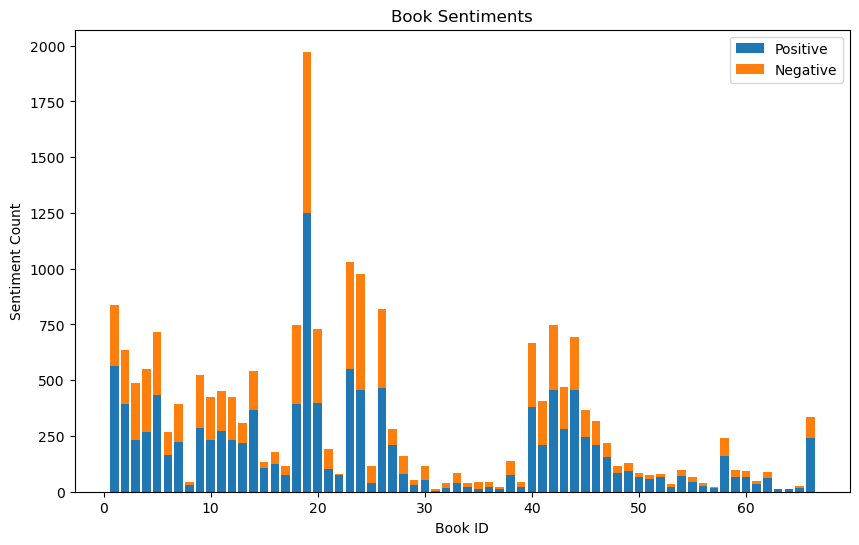

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of positive and negative sentiments for each book_id
sentiment_counts = visualization_df.groupby('book_id')['Sentiment'].value_counts().unstack().fillna(0)

# Determine if each book_id is positive or negative based on sentiment counts
sentiment_counts['Book Sentiment'] = sentiment_counts.apply(lambda row: 'positive' if row['positive'] > row['negative'] else 'negative', axis=1)

# Plot the book sentiments
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts['positive'], label='Positive')
plt.bar(sentiment_counts.index, sentiment_counts['negative'], bottom=sentiment_counts['positive'], label='Negative')
plt.xlabel('Book ID')
plt.ylabel('Sentiment Count')
plt.title('Book Sentiments')
plt.legend()
plt.show()


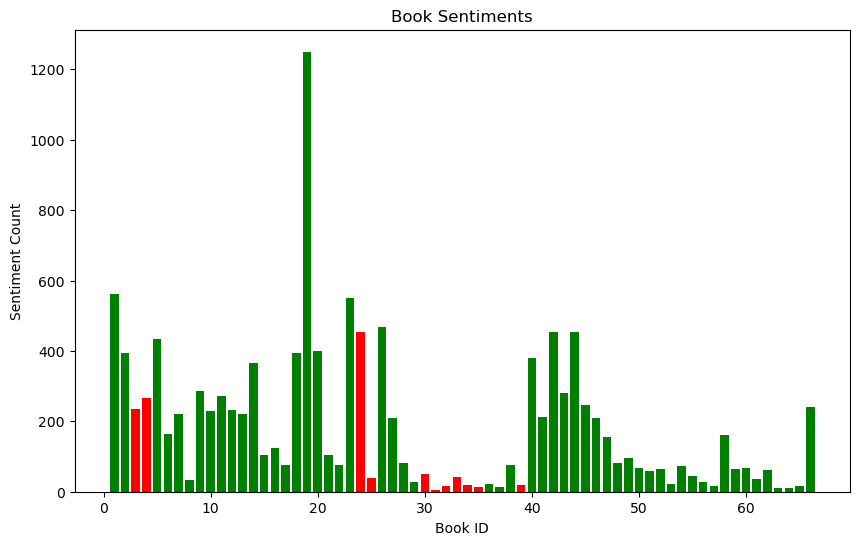

In [ ]:
# Permet de voir les sentiments par livre de la bible (positif ou négatif)
# si plus de verse positif que négatif alors le livre est positif (et inversement)

import matplotlib.pyplot as plt

# Calculate the count of positive and negative sentiments for each book_id
sentiment_counts = visualization_df.groupby('book_id')['Sentiment'].value_counts().unstack().fillna(0)

# Determine if each book_id is positive or negative based on sentiment counts
sentiment_counts['Book Sentiment'] = sentiment_counts.apply(lambda row: 'positive' if row['positive'] > row['negative'] else 'negative', axis=1)

# Assign colors based on sentiment
colors = ['green' if sentiment == 'positive' else 'red' for sentiment in sentiment_counts['Book Sentiment']]

# Plot the book sentiments with assigned colors
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts['positive'], color=colors)
plt.xlabel('Book ID')
plt.ylabel('Sentiment Count')
plt.title('Book Sentiments')
plt.show()
